# Visulization
Author: **Shiming Luo and Tejas Bhakta**<br>

This is the visualization of our project data, including some pre-processing of cleaned data. We will use Pandas and interactive Plotly heatmaps to visualize in each state:

- Any Mental Health Illness Data by totals as well as by %.  
- Serious Mental Health Illness Data by totals as well as by %.
- Gun Fatalities by totals and # per 100,000
- Violent Crime by totals and # per 100,000
- Percent of people with a Mental Illness that recieved treatment

## Gun Shot data

In [2]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.plotly as py
import os
import re
import locale
from locale import atof
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
def prepGunshotData(df):
    '''
    Pre-processing of gunshot data, including add the abbreviation of each state and convert Poverty 
    rate to float type. Using pandas.
    
    :@param df: pandas.core.frame.DataFrame, the input data.
    :@return df: pandas.core.frame.DataFrame, processed output data.
    '''
    import pandas
    
    assert isinstance(df, pandas.core.frame.DataFrame), 'The input data is not a DataFrame.'
    
    us_state_abbrev = {
        'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO',
        'Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID',
        'Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA',
        'Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN',
        'Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV',
        'New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC',
        'North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI',
        'South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT',
        'Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'
    }
    try:
        df['Poverty rate'] = df['Poverty rate'].str.rstrip('%').astype('float') / 100.0
    except:
        raise ValueError, 'Cannot do Poverty rate convert'
    try:
        df.insert(loc=0, column='code', value=[us_state_abbrev[i] for i in df['State']])
    except:
        raise ValueError, 'Missing value'
        
    assert isinstance(df, pandas.core.frame.DataFrame), 'The input data is not a DataFrame.'
        
    return df

Read and plot the gunshot data

In [4]:
df_gunshot = pd.read_csv('../data/gunshot.csv')
df_gunshot = prepGunshotData(df_gunshot)
df_gunshot

,code,State,"Firearm deaths per 100,000 people",Poverty rate,Permit required to carry handgun,Violent crime rate,Total firearm deaths 2016
0,MS,Mississippi,19.8,0.208,No,280.5,587
1,OK,Oklahoma,19.6,0.163,Yes,449.8,766
2,DE,Delaware,10.9,0.117,Yes,508.8,111
3,MN,Minnesota,7.6,0.099,Yes,242.6,432
4,AK,Alaska,23.0,0.099,No,804.2,177
5,IL,Illinois,11.6,0.130,FOID,436.3,1490
6,AR,Arkansas,17.7,0.172,Yes,550.9,541
7,NM,New Mexico,18.2,0.198,Yes,702.5,383
8,OH,Ohio,12.9,0.146,Yes,300.3,1524
9,IN,Indiana,14.9,0.141,Yes,404.7,997


Using Python module sns to seek the realationship between different items. These pairplot show us permit requirement is not a useful piece of data to analyze

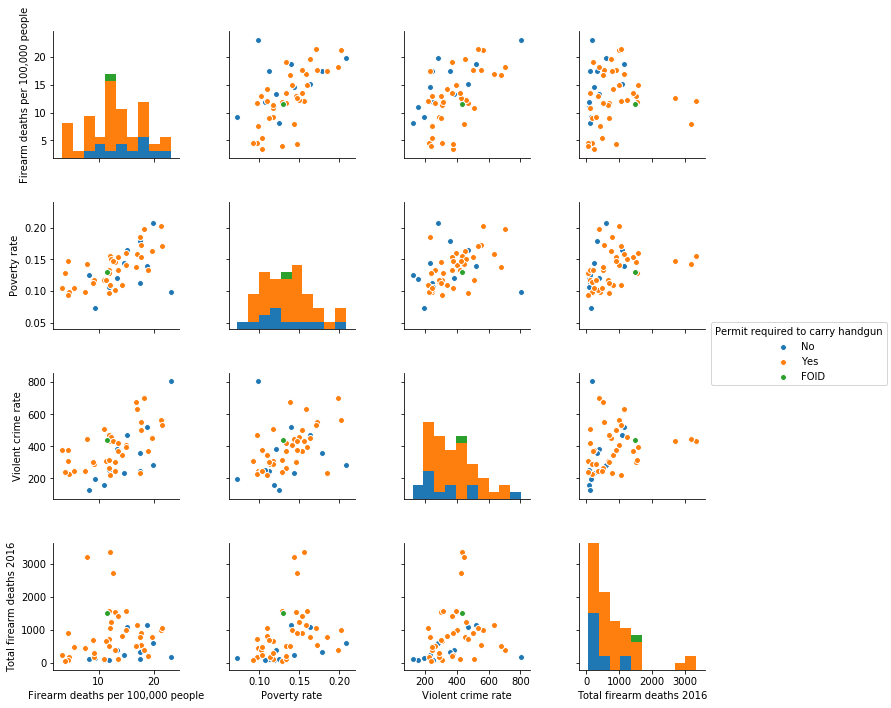

In [5]:
pair_plot = sns.pairplot(df_gunshot, hue = 'Permit required to carry handgun')
pair_plot.savefig('figure/PairPlot.png')

Here we are using Plotly to make heatmaps to describe the data visually. While color density is not the easiest way to see data it is the best way to see data across states, since bar graphs and pie plots result in indecipherable rainbow-like graphs

In [6]:
def mapPlot(df, item):
    '''
    Generate a heatmap over the American map by using module plotly. The function plotly.plotly.iplot in plotly 
    can identify the abbreviation (called 'code' in the data) of each state in America, so it is uesd to assign 
    values of item to corresponding states.
    
    :@prama df: pandas.core.frame.DataFrame, input data.
    :@param item: string, the column of the data that need to be plot.
    :@return res: plotly.tools.PlotlyDisplay, the heatmap.
    '''
    import pandas
    
    assert isinstance(df, pandas.core.frame.DataFrame), 'The input data is not a DataFrame.'
    assert isinstance(item, str), 'The input item is not a string.'
    
    
    for col in df.columns:
        df[col] = df[col].astype(str)
    
    ### color scale
    scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
                [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

    try:
        data = [ dict(
                type='choropleth',
                colorscale = scl, ### setting color scale
                autocolorscale = False,
                locations = df['code'], ### locate the rows to corresponding states
                z = df[item].astype(float), ### determine the item we wanna plot
                locationmode = 'USA-states', ### chose the map model
                marker = dict(line = dict ( color = 'rgb(255,255,255)',
                                            width = 2 ) ) ) 
               ]
    except:
        raise ValueError,'Cannot convert the data in require column.'

    layout = dict(
            title = '2016 US {}'.format(item),
            geo = dict(
                scope='usa',
                projection=dict( type='albers usa' ),
                showlakes = True,
                lakecolor = 'rgb(255, 255, 255)'),
                 )

    fig = dict( data=data, layout=layout )
    res = py.iplot( fig, filename='d3-cloropleth-map' )
    
    assert isinstance(res,plotly.tools.PlotlyDisplay)
    
    return res

# Heatmaps
- The Heatmaps in the following section are interactive if you run the plotly cells in jupyter notebook
- Png plots are also displayed if the Notebook is being viewed in GitHub, but are not interactive

# Heatmaps for Firearm deaths per 100,000 people, Total Firearm Deaths, and Violent Crime Rate (by State)

The heatmap can be generated on any column that is only contains numerical values.

In [7]:
### api_key is need for online plot
plotly.tools.set_credentials_file(username='shl666', api_key='63b9Xz7eRm7yqi5GrSK2')
heatmap_deaths = mapPlot(df_gunshot, 'Firearm deaths per 100,000 people')
heatmap_deaths

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~shl666/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [8]:
heatmap_deaths1 = mapPlot(df_gunshot, 'Total firearm deaths 2016')
heatmap_deaths1

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~shl666/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [9]:
heatmap_deaths2 = mapPlot(df_gunshot, 'Violent crime rate')
heatmap_deaths2

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~shl666/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


- The interactive heatmap is not able to be seen on the github preview. So we saved it as a png file and plot it by module matplotlib.

In [10]:
def plotPng(fname):
    '''
    Plot .png file.
    
    :@param fname: string, file name, end with '.png'
    '''
    
    assert isinstance(fname,str), 'The input fname need to be a string.'
    assert fname[-4:] == '.png', 'The input fname need to be ended with .png'
    
    try:
        img=mpimg.imread(fname)     ### read file
        plt.figure(figsize=(20,20)) ### set the size to 20inch*20inch
        plt.axis('off')             ### remove axis
        plt.imshow(img)             ### plot figure
    except:
        raise ValueError,'The {} can not be plotted.'.format(fname)

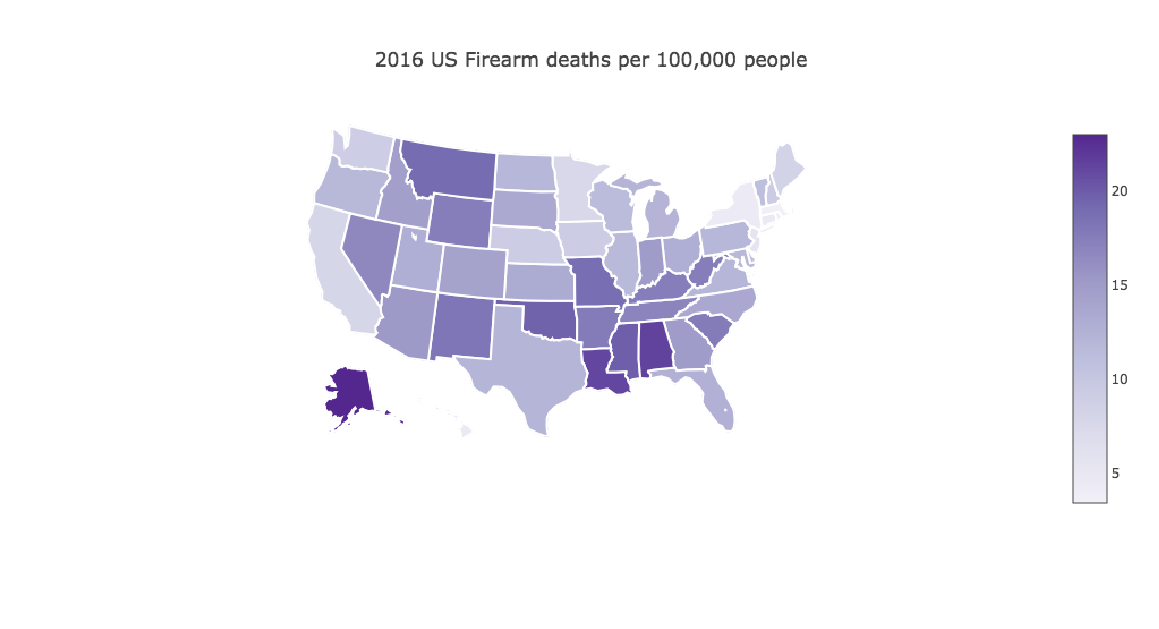

In [11]:
plotPng('figure/heatmap_deaths.png')
# Firearm deaths per 100,000 people in each state

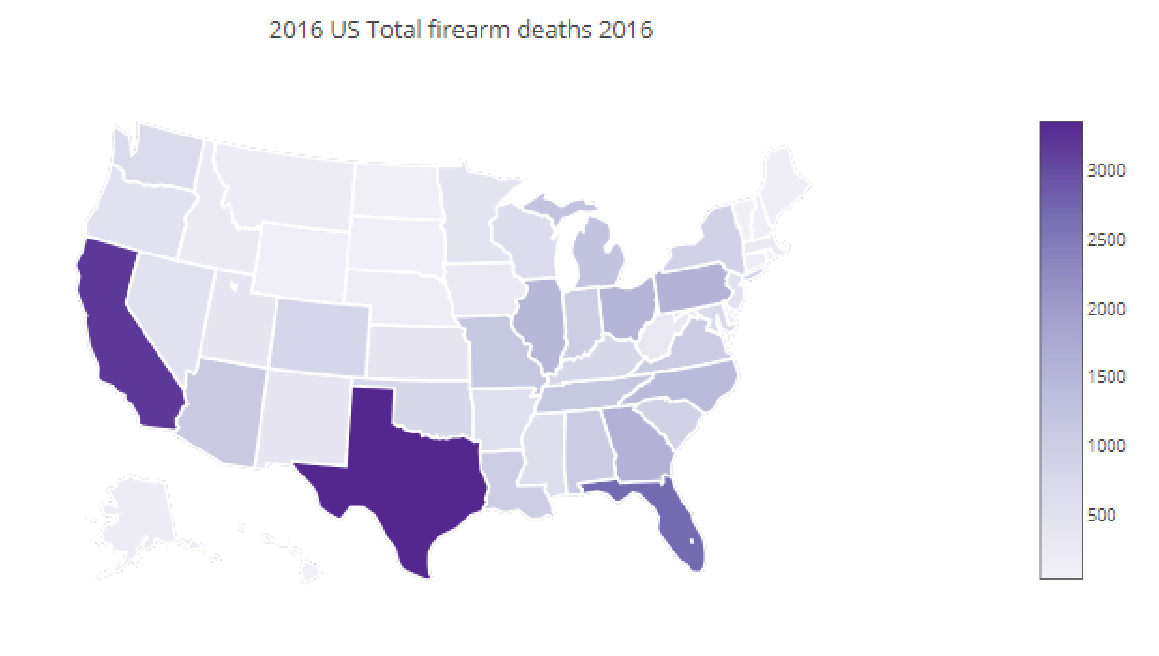

In [12]:
plotPng('figure/Totals_Firearm.png')
# Total Firearm deaths in each state across the US

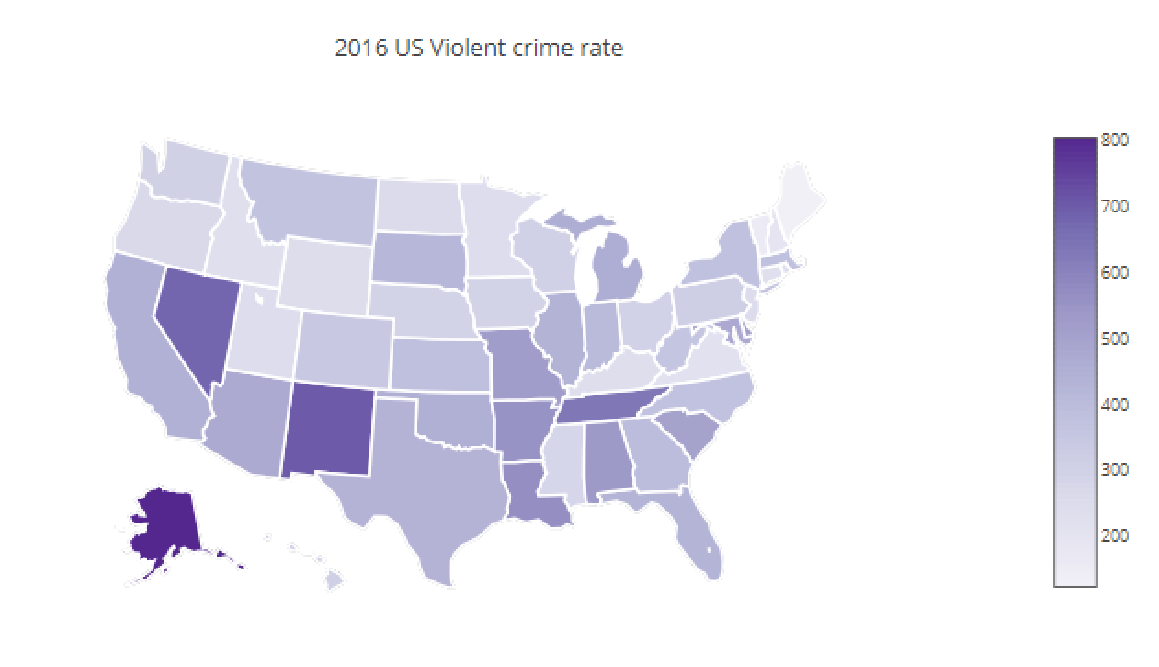

In [13]:
plotPng('figure/ViolentCrimeRate.png')
# Violent Crime Rate in each state across the US

When we plot the heap map for Permit required to carry handgun, we need to convert the value first.

## Mental Health data
The mental health data is seperated in 52 .csv files, we need to merge them into one file and then do the visualizaition.

### Percentage Mental Health data

In [14]:
def merge2one(in_path,out_path, idx):
    '''
    Merge the small .csv files into one.
    
    :@param in_path:str, the path to the data file directory
    :@param out_path:str, the path of the output file
    :@param idx: int, use to get the state name from sub file name 
                    e.g.for 'TheAlabamaPercentageTable.csv' -> 'Alabama', idx would be -19 
    '''
    
    assert isinstance(in_path, str) and isinstance(out_path, str)
    
    ### get the list of file names
    try:
        csv_lst = os.listdir(in_path)
    except:
        raise ValueError, 'Can not get the data files.'
        
    ### state's name to abbrevation dictionary    
    us_state_abbrev = {
        'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO',
        'Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID',
        'Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA',
        'Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN',
        'Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV',
        'New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC',
        'North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI',
        'South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT',
        'Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'
    }
        
    ### merge file
    dfs = [] ### the list of sub data frames
    for i in xrange(len(csv_lst)):
        file_name = csv_lst[i]
        state = ' '.join(re.sub( r"([A-Z])", r" \1", file_name[3:idx]).split()) ### get the state's name
                                                                               ### e.g. 'TheAlabamaPercentageTable.csv' -> 'Alabama'
        if state not in us_state_abbrev:  ### skip the file if the state's name is not in the dictionary
            continue
        df = pd.read_csv(in_path+file_name)  ### read file
        df.loc[5]=['State',state] ### add 'State' row
        df = df.rename(columns={'Measure':'idx', '18+':i}) ### rename the column, prepare to be index
        df = df.set_index('idx',inplace=False) ### change index and transpose
        df = df.T
        dfs.append(df)
    df = pd.concat(dfs) ### merge sub data frames
    df.insert(loc=0, column='code', value=[us_state_abbrev[i] for i in df['State']]) ### add the 'code' column for heatmap plotting
    
    ### save it to a new .csv file
    assert out_path[-4:] == '.csv', 'The extension of output file is not .csv'
    df.to_csv(out_path)

In [15]:
### the path of metal health data
in_path = "../data/mental_health_percentage/"
out_path = '../data/mental_health_percentage.csv'

### merge the sub files into one
merge2one(in_path,out_path,-19)

### read data
fname = '../data/mental_health_percentage.csv'
df_mh = pd.read_csv(fname)
df_mh

,Unnamed: 0,code,Serious Mental Illness,Any Mental Illness,Received Mental Health Services,Had Serious Thoughts of Suicide,Major Depressive Episode,State
0,0,AL,4.23,18.47,12.98,3.57,6.66,Alabama
1,1,AK,4.53,20.01,13.54,5.15,7.39,Alaska
2,2,AZ,4.04,17.52,11.87,4.01,6.03,Arizona
3,3,AR,5.45,21.02,15.54,4.47,8.13,Arkansas
4,4,CA,3.61,17.15,11.59,3.96,6.04,California
5,5,CO,4.61,20.05,15.86,4.88,7.62,Colorado
6,6,CT,3.59,18.00,17.05,3.76,6.84,Connecticut
7,7,DE,4.23,17.71,15.06,4.35,6.52,Delaware
8,9,FL,3.56,17.30,12.75,3.34,6.12,Florida
9,10,GA,4.17,17.74,12.03,3.94,6.72,Georgia


# Heatmap of Serious/Any Mental Illnesses by State across US (%) 

In [16]:
heatmap_AMI = mapPlot(df_mh, 'Any Mental Illness')
heatmap_AMI


High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~shl666/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [17]:
heatmap_AMI = mapPlot(df_mh, 'Serious Mental Illness')
heatmap_AMI

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~shl666/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


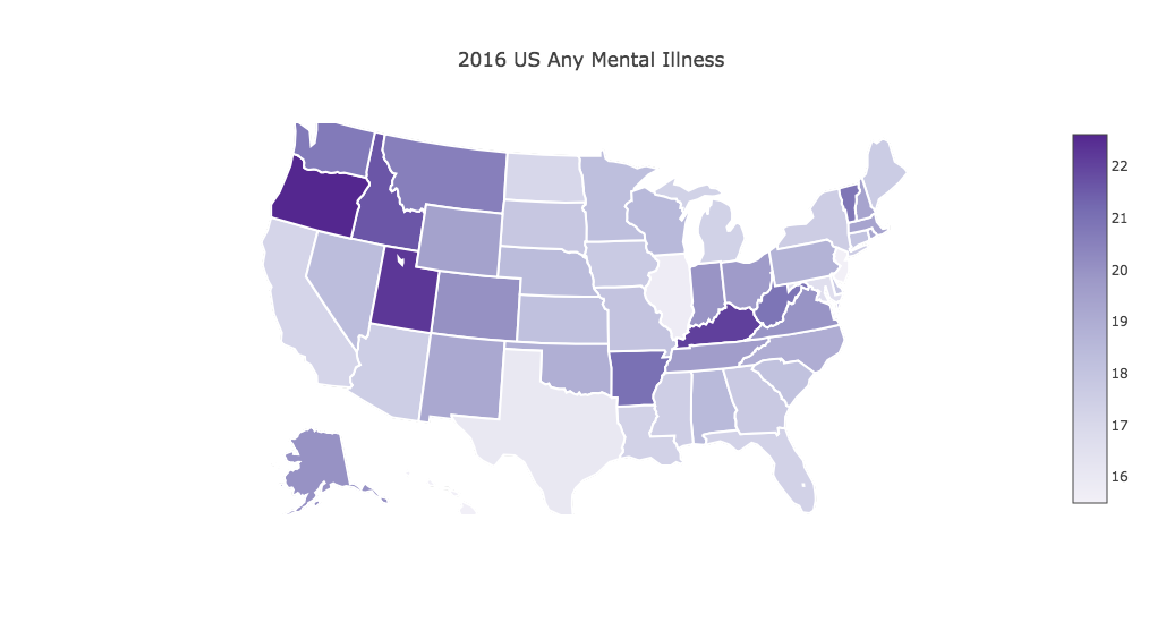

In [18]:
plotPng('figure/heatmap_AMI.png')
# heatmap of Any type of mental illness in % of people in each state

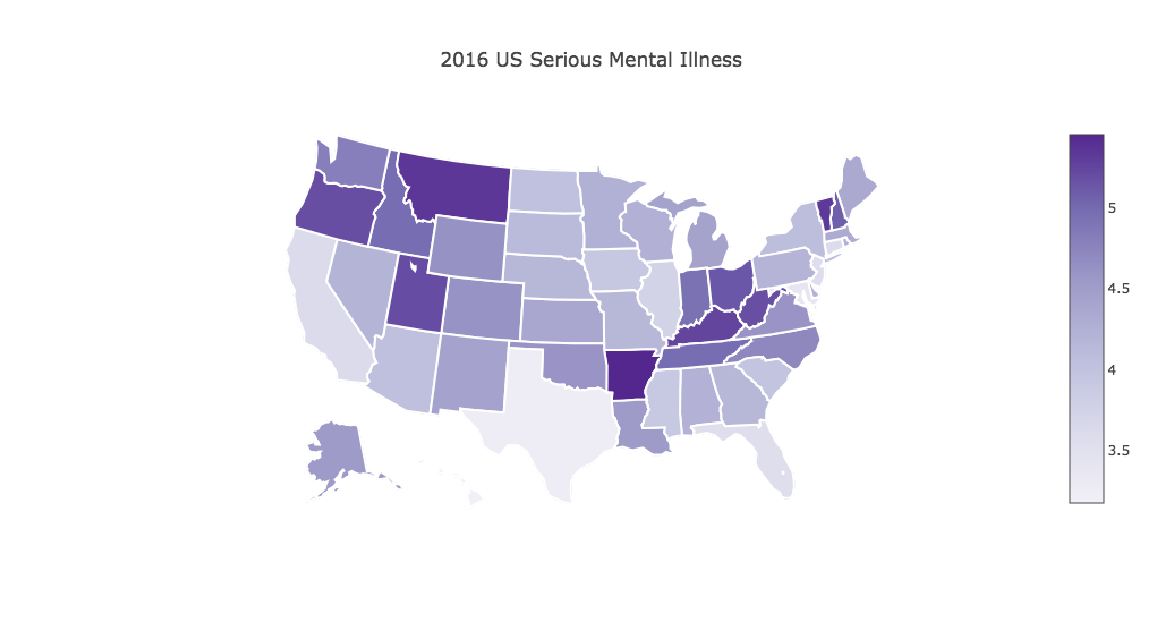

In [19]:
plotPng('figure/heatmap_SMI.png')
# heatmap of serious type of mental illness in % of people in each state

### Total Mental Health data

In [20]:

### the path of metal health data
in_path = "../data/mental_health/"
out_path = '../data/mental_health.csv'

### merge the sub files into one, writes it to out_path
merge2one(in_path,out_path,-9)

### read data
fname = '../data/mental_health.csv'
df_mh_total = pd.read_csv(fname)
df_mh_total


,Unnamed: 0,code,Serious Mental Illness,Any Mental Illness,Received Mental Health Services,Had Serious Thoughts of Suicide,Major Depressive Episode,State
0,0,AL,156,680,478,132,245,Alabama
1,1,AK,24,105,71,27,39,Alaska
2,2,AZ,208,902,611,206,310,Arizona
3,3,AR,121,468,346,100,181,Arkansas
4,4,CA,"1,068","5,072","3,427","1,173","1,786",California
5,5,CO,191,832,658,203,316,Colorado
6,6,CT,100,500,473,104,190,Connecticut
7,7,DE,31,129,110,32,48,Delaware
8,9,FL,570,"2,769","2,039",535,979,Florida
9,10,GA,315,"1,341",909,298,508,Georgia


Sometimes some of the values in it are string and contains comma. We need do some proces to it. (For total mental health data)

In [21]:
    '''
    #DEPRECATED, replaced by Tejas with mental_to_float()
    def lc2num(df,item):
    
    Convert the string that contains comma to float.
    :@prama df: pandas.core.frame.DataFrame, input data frame.
    :@prama item: str, the column that need to convert
    :@return df_new: pandas.core.frame.DataFrame, output data frame with converted column
    
    import pandas
    
    assert isinstance(df, pandas.core.frame.DataFrame), 'The input data is not a DataFrame.'
    assert isinstance(item, str), 'The input item need to be a string.'
    assert item in [i for i in df], 'The input item is not the name of a column'
    
    ### way to change string with comma to float
    locale.setlocale(locale.LC_NUMERIC, '') 

    ### generate new data frame
    df_converted = pd.DataFrame(df[item]).applymap(atof)### change string with comma to float
    del df[item]

    df_new = pd.concat([df,df_converted],axis=1) ### merge
    assert isinstance(df_new, pandas.core.frame.DataFrame), 'The output data is not a DataFrame.'
    
    return df_new
    '''
    

"\n#DEPRECATED, replaced by Tejas with mental_to_float()\ndef lc2num(df,item):\n\nConvert the string that contains comma to float.\n:@prama df: pandas.core.frame.DataFrame, input data frame.\n:@prama item: str, the column that need to convert\n:@return df_new: pandas.core.frame.DataFrame, output data frame with converted column\n\nimport pandas\n\nassert isinstance(df, pandas.core.frame.DataFrame), 'The input data is not a DataFrame.'\nassert isinstance(item, str), 'The input item need to be a string.'\nassert item in [i for i in df], 'The input item is not the name of a column'\n\n### way to change string with comma to float\nlocale.setlocale(locale.LC_NUMERIC, '') \n\n### generate new data frame\ndf_converted = pd.DataFrame(df[item]).applymap(atof)### change string with comma to float\ndel df[item]\n\ndf_new = pd.concat([df,df_converted],axis=1) ### merge\nassert isinstance(df_new, pandas.core.frame.DataFrame), 'The output data is not a DataFrame.'\n\nreturn df_new\n"

In [22]:
### convert the data we need
import locale
import pandas as pd
def mental_to_float():
    """
    Function to convert the totals mental health by state data to float, since the commas in the numbers messed stuff up
    """
    ### read data
    df_mh = pd.read_csv('../data/mental_health.csv')
    df_mh

    # way to change string with comma to float
    locale.setlocale(locale.LC_NUMERIC, '') 

    ### generate new mental health data frame
    df_mh_1 = df_mh[[[i for i in df_mh][1]]]
    df_mh_2 = df_mh[[i for i in df_mh][2:-1]].applymap(atof)### change string with comma to float
    df_mh_3 = df_mh[[[i for i in df_mh][-1]]]

    df_mh_new = pd.concat([df_mh_1,df_mh_2,df_mh_3],axis=1) ### merge
    return df_mh_new

In [23]:
df_mh_new = mental_to_float()
df_mh_new
# mental health data properly changed to floats, commas removed and converted

,code,Serious Mental Illness,Any Mental Illness,Received Mental Health Services,Had Serious Thoughts of Suicide,Major Depressive Episode,State
0,AL,156.0,680.0,478.0,132.0,245.0,Alabama
1,AK,24.0,105.0,71.0,27.0,39.0,Alaska
2,AZ,208.0,902.0,611.0,206.0,310.0,Arizona
3,AR,121.0,468.0,346.0,100.0,181.0,Arkansas
4,CA,1068.0,5072.0,3427.0,1173.0,1786.0,California
5,CO,191.0,832.0,658.0,203.0,316.0,Colorado
6,CT,100.0,500.0,473.0,104.0,190.0,Connecticut
7,DE,31.0,129.0,110.0,32.0,48.0,Delaware
8,FL,570.0,2769.0,2039.0,535.0,979.0,Florida
9,GA,315.0,1341.0,909.0,298.0,508.0,Georgia


# Heatmaps of Totals Serious/Any Mental Illness across US (in thousands)

In [70]:
### generate the heapmap
heatmap_totalAMI = mapPlot(df_mh_new, 'Any Mental Illness')
heatmap_totalAMI

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~shl666/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [60]:
heatmap_totalAMI = mapPlot(df_mh_new, 'Serious Mental Illness')
heatmap_totalAMI

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~shl666/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


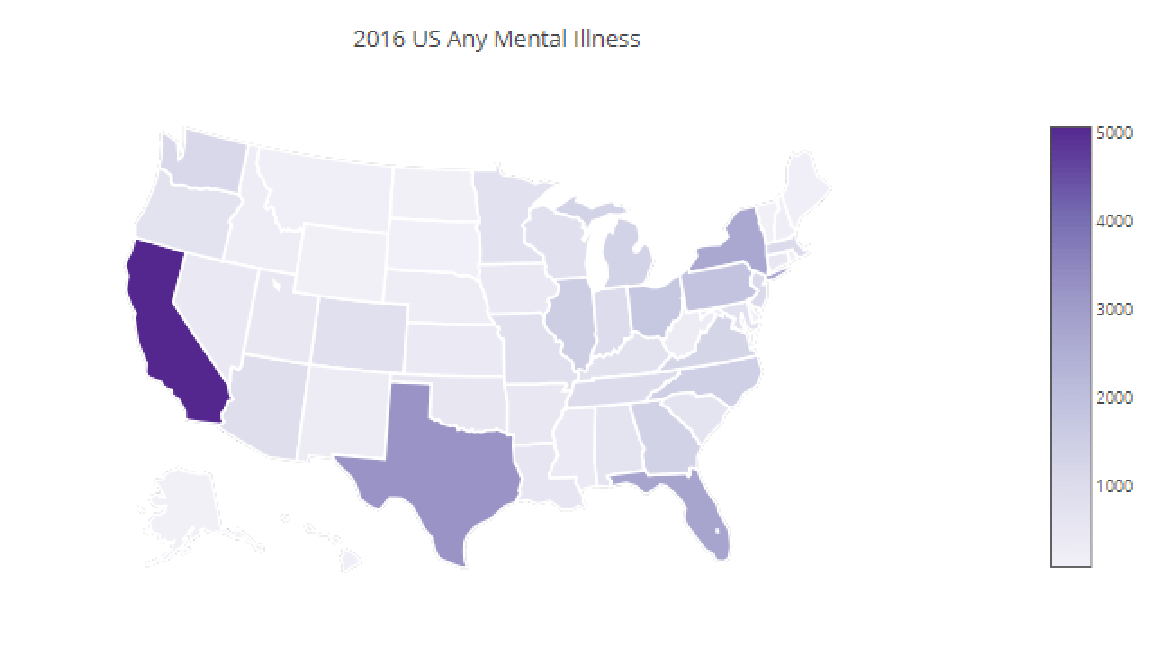

In [87]:
plotPng('figure/Totals_AnyMentalIllnes.png')
# heatmap of total number of Any kind of Mental illness in each state

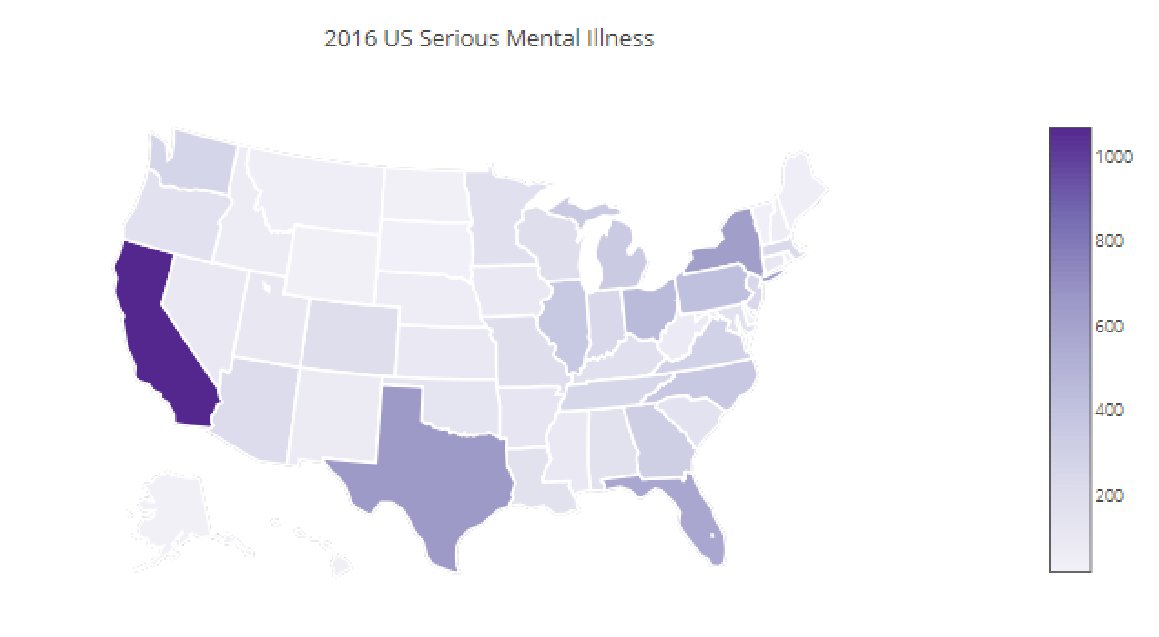

In [86]:
plotPng('figure/Totals_SeriousMentalIllness.png')
# heatmap of total number of Serious kind of Mental illness in each state

# Heatmap of % of people that have a Mental Illness that recieved treatment
- Note that in a few (1 or 2) states, more people recieved treatment for a mental illness than people that actually had a mental illness

In [43]:
import pandas
# This cell will create 3 columns with the State name, state abbrev., and % of people w/mental Illness that recieved treatment
df_mh_new = mental_to_float()
df_div = df_mh_new['Received Mental Health Services ']/df_mh_new['Any Mental Illness']
d = list(df_div) 

df_div1 = pandas.DataFrame(d,columns=['Percent Treated'])
us_state_abbrev = {
        'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO',
        'Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID',
        'Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA',
        'Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN',
        'Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV',
        'New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC',
        'North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI',
        'South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT',
        'Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'
    }
df_div1.insert(loc=1, column='State', value=df_mh_new['State'])
df_div1.insert(loc=0, column='code', value=[us_state_abbrev[i] for i in df_div1['State']])

In [44]:
heatmap_totalAMI = mapPlot(df_div1, 'Percent Treated')
heatmap_totalAMI

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~shl666/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


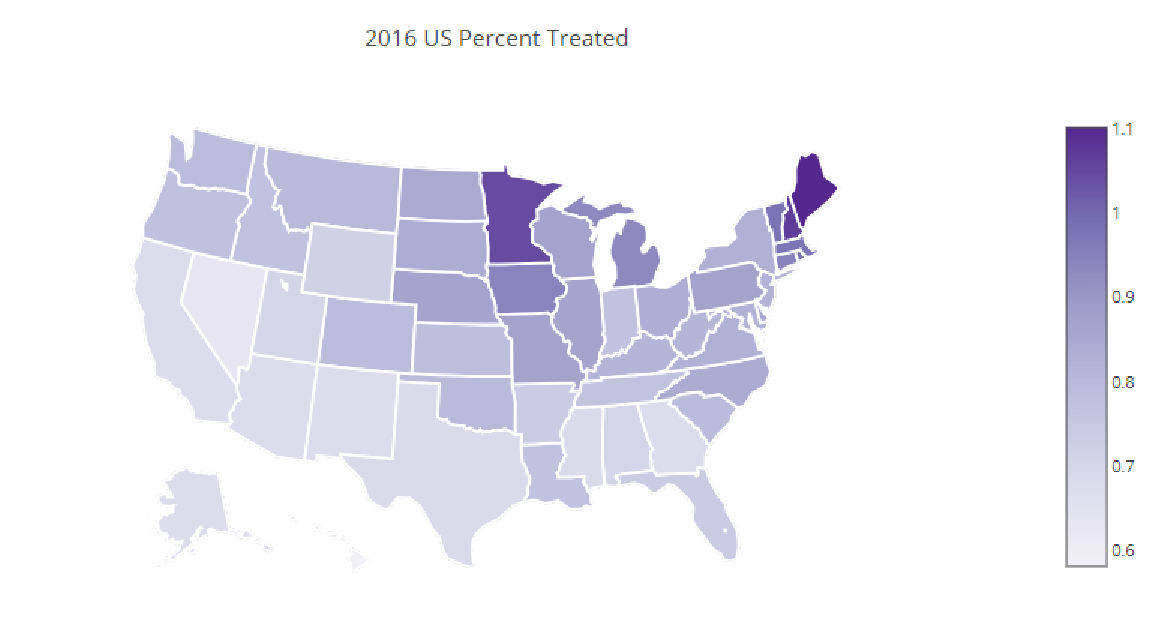

In [45]:
plotPng('figure/Percent_Treated.png')
# heatmap of % of people with mental illness in each state that recieved some sort of treatment 